<a href="https://colab.research.google.com/github/KeerHu73/EDA/blob/main/lab/gss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

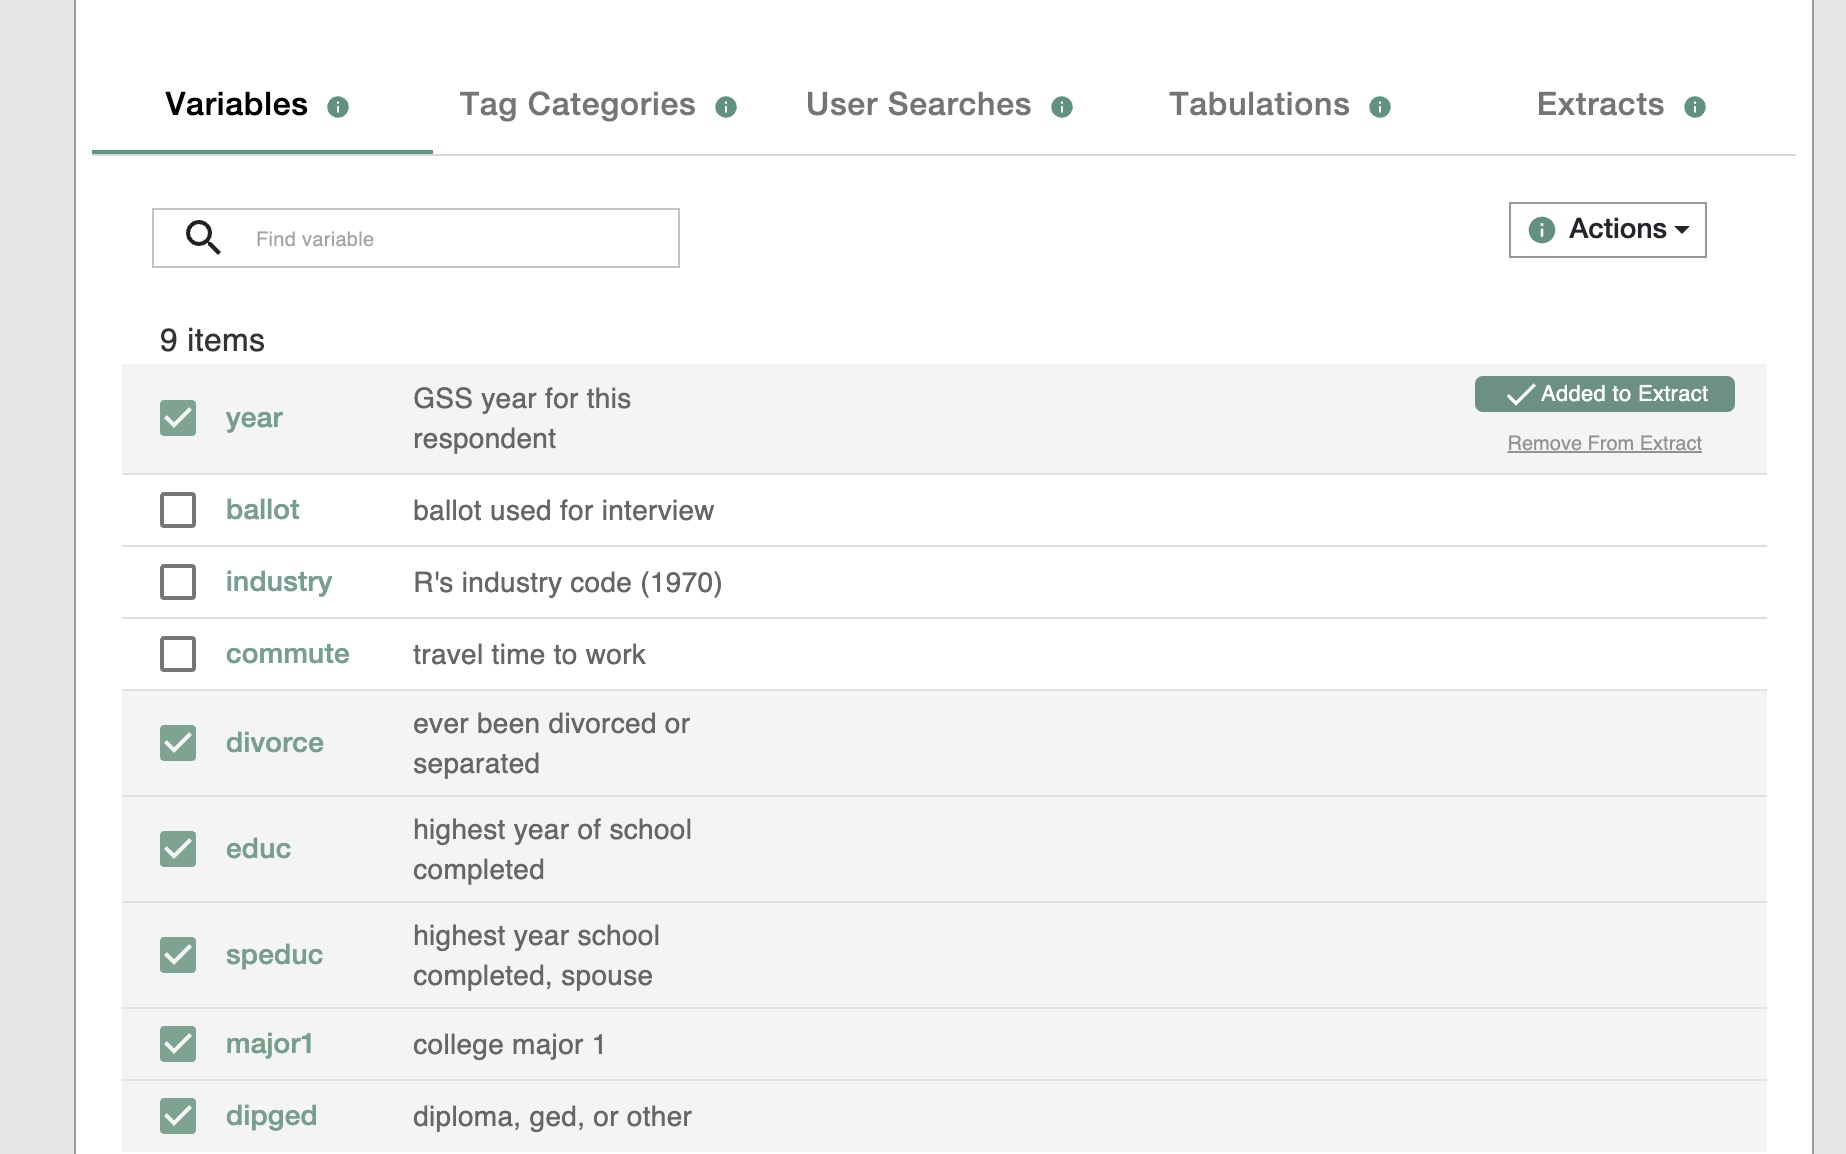

In [2]:
import pandas as pd
#
var_list = ['year', 'divorce','educ','speduc','major1','dipged'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows

    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

2. When I first started looking at the GSS variables, the two that immediately caught my attention were divorce and education. I was curious—does a person’s level of education have any impact on their likelihood of getting divorced? It seemed like an interesting question because education can influence many aspects of life, from financial stability to communication skills, which might also affect relationships and marriage.

As I explored further, I realized that just looking at education and divorce alone might not be enough. So, I decided to add speduc (spouse’s education level) to see whether couples tend to have similar educational backgrounds and whether that plays a role in marriage stability. I also included major1, which represents a person's college major, to explore whether different fields of study are linked to different divorce rates. For example, do people in STEM fields have lower divorce rates compared to those in social sciences or the arts?

Another variable I thought could be relevant was dipged, which indicates whether someone earned a GED instead of a traditional diploma. I wondered if people who took alternative education paths had different marriage outcomes compared to those who followed the traditional school system. Lastly, I included year to check whether divorce trends have changed over time—are people divorcing more or less in recent years, and how does that relate to education levels?

Overall, my goal is to explore the relationship between education and marital stability. I want to see whether education affects divorce likelihood, whether couples with similar education levels stay together longer, and whether certain college majors are associated with higher or lower divorce rates. Additionally, looking at trends over time could provide insight into whether societal attitudes toward marriage and education have shifted.

In [3]:
import pandas as pd

# read the data and get ready to clean
df = pd.read_csv("selected_gss_data.csv")

#print(df.head(),'\n')
#print(df.info(),'\n')# check the type of the variables
#print(df.isnull().sum(),'\n') #checking the missing values

#major1     65165
#dipged     57010
# these two variables missed too much, so we could drop them
df = df.drop(['major1', 'dipged'], axis=1)

# For the divorce data, filling in the missing values and change the type
df['divorce']=df['divorce'].fillna("never married").astype('category')

# change the type of
df['educ']=df['educ'].fillna(df['educ'].median()).astype(int)
df['speduc']=df['speduc'].fillna(df['speduc'].median()).astype(int)

print(df.head(),'\n')
print(df.info(),'\n')
print(df.isnull().sum(),'\n')

   year        divorce  educ  speduc
0  1972  never married    16      12
1  1972             no    10      12
2  1972             no    12      11
3  1972             no    17      20
4  1972             no    12      12 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   year     72390 non-null  int64   
 1   divorce  72390 non-null  category
 2   educ     72390 non-null  int64   
 3   speduc   72390 non-null  int64   
dtypes: category(1), int64(3)
memory usage: 1.7 MB
None 

year       0
divorce    0
educ       0
speduc     0
dtype: int64 



Produce some numeric summaries and visualizations. (1-3 pages)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Before analysis, I would check the dataset to ensure it is clean and ready for EDA.

print(df.describe(),'\n')
print(df['divorce'].value_counts())  # I want to know the distribution of divorces


               year          educ        speduc
count  72390.000000  72390.000000  72390.000000
mean    1997.715541     13.030874     12.524409
std       15.109995      3.177196      2.299635
min     1972.000000      0.000000      0.000000
25%     1985.000000     12.000000     12.000000
50%     1998.000000     12.000000     12.000000
75%     2010.000000     16.000000     12.000000
max     2022.000000     20.000000     20.000000 

divorce
no               34738
never married    28286
yes               9366
Name: count, dtype: int64


First, I want to investgate the marriage and divorce rate over time.
I will focus on two questions:
Has the divorce rate increased or decreased over time?

1.   Has the divorce rate increased or decreased over time?
2.   What years show significant changes?


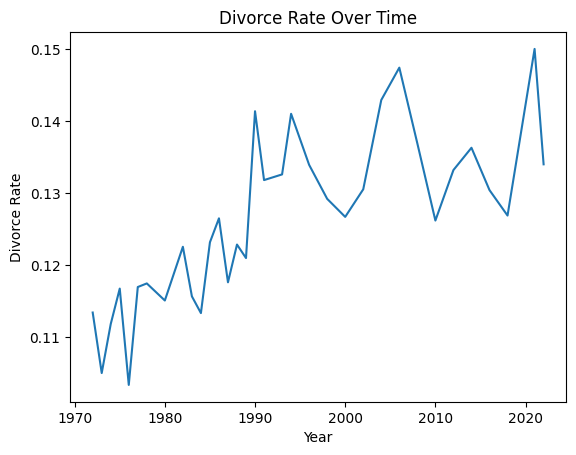

In [10]:
var = 'divorce'
group = 'year'

# Calculate the annual divorce statistics
divorce_summary = df.loc[:, [group, var]].groupby(group).describe()

# Calculate the number of divorce each year.
divorce_counts = df.loc[:, [group, var]].groupby(group)[var].apply(lambda x: (x == 'yes').sum())

# Calculate the total number of people each year
total_counts = df.groupby(group).size()

# Calculate divorce rate
divorce_rate = divorce_counts / total_counts

# change to DataFrame (it is easier to plot)
divorce_rate_df = divorce_rate.reset_index()
divorce_rate_df.columns = ['year', 'divorce_rate']

# Line plot
sns.lineplot(data=divorce_rate_df, x='year', y='divorce_rate')
plt.title("Divorce Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Divorce Rate")
plt.show()


Second, I would investigate the Education and Divorce Rate.
The question I focused on is:
#####Are people with higher education levels more or less likely to divorce?

I would use boxlot to show the distribution of education levels among different marital statuses

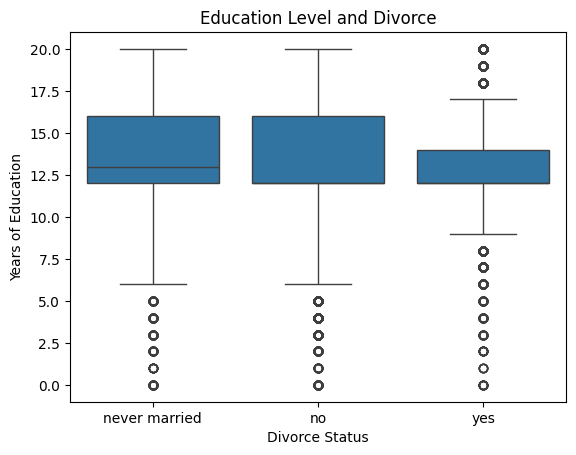

In [11]:
sns.boxplot(x=df['divorce'], y=df['educ'])
plt.title("Education Level and Divorce")
plt.xlabel("Divorce Status")
plt.ylabel("Years of Education")
plt.show()

Then，my third relationship is the impact of Spouse’s Education on Divorce
My Questions are:

1.   Are marriages with a large education gap more unstable?
2.   Do couples with similar education levels stay together longer?

I could use the scatter plot( Respondent vs. Spouse’s Education)
to check if spouses tend to have similar education levels.

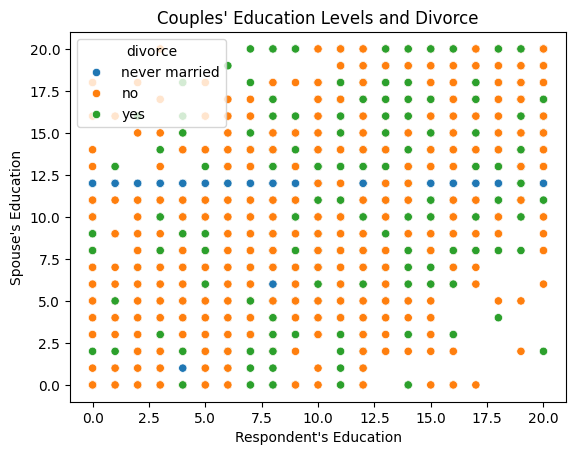

In [12]:
sns.scatterplot(x=df['educ'], y=df['speduc'], hue=df['divorce'])
plt.title("Couples' Education Levels and Divorce")
plt.xlabel("Respondent's Education")
plt.ylabel("Spouse's Education")
plt.show() # That is a terrible plot to see. I would use others.

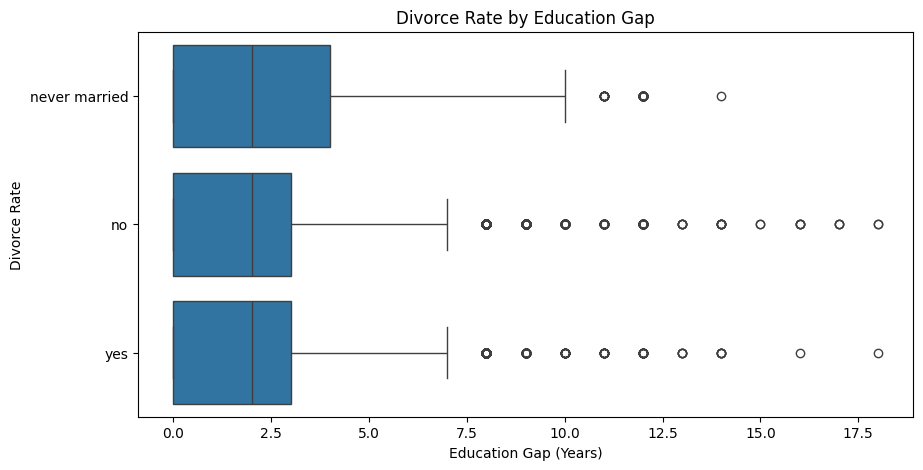

In [13]:
# Calculating the education gap
df['educ_gap'] = abs(df['educ'] - df['speduc'])

# Plot the divorce rate by education gap
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['educ_gap'], y=df['divorce'])
plt.title("Divorce Rate by Education Gap")
plt.xlabel("Education Gap (Years)")
plt.ylabel("Divorce Rate")
plt.show()
# This way, we can see if the divorce rate is higher when there is a significant educational gap between spouses?

I would explain all my observations from these plots and findings now:

: